### Nesterov 动量梯度下降算法详解

Nesterov 动量梯度下降（Nesterov Accelerated Gradient，简称 NAG）是经典动量梯度下降的改进版，结合了动量方法的收敛加速特性和对梯度方向的更早感知，能够加速收敛速度并避免一些陷阱（如振荡或不必要的更新）。

---

### **背景知识：经典动量梯度下降**
在动量方法中，引入了一个额外的动量变量 $ v $ 来平滑梯度更新：
1. 动量用于累积梯度的历史信息，类似物理中的动量，提供“惯性”。
2. 更新公式：
   $$
   v_t = \gamma v_{t-1} + \eta \nabla f(\theta_t)
   $$
   $$
   \theta_{t+1} = \theta_t - v_t
   $$
   其中：
   - $ v_t $：当前动量。
   - $ \gamma $：动量系数，通常取 $ 0.9 $。
   - $ \eta $：学习率。
   - $ \nabla f(\theta_t) $：当前位置 $ \theta_t $ 的梯度。

### **Nesterov 动量的改进**
Nesterov 动量的核心思想是：**在更新参数之前，提前感知未来方向的梯度**，从而对梯度变化有更敏锐的响应。

#### **更新公式**
1. **计算预估参数位置**：
   $$
   \tilde{\theta}_t = \theta_t + \gamma v_{t-1}
   $$
   这里，$\tilde{\theta}_t$ 是根据上一步动量 $ v_{t-1} $ 预测的参数位置。

2. **在预估位置上计算梯度**：
   $$
   \nabla f(\tilde{\theta}_t)
   $$

3. **更新动量和参数**：
   $$
   v_t = \gamma v_{t-1} + \eta \nabla f(\tilde{\theta}_t)
   $$
   $$
   \theta_{t+1} = \theta_t - v_t
   $$

#### **公式解释**
- **预估未来**：在当前参数 $ \theta_t $ 的基础上，先按照动量的方向 $ \gamma v_{t-1} $ 进行预测，得到一个临时位置 $\tilde{\theta}_t$。
- **计算新的梯度**：在预估位置 $\tilde{\theta}_t$ 计算梯度，提前感知变化趋势。
- **更准确的更新**：将感知的梯度用于更新动量和参数，使更新方向更精确。

---

### **直观理解**
#### **动量方法的缺陷**
动量方法将过去的梯度累积，但可能会在局部最优点附近或震荡区域中过度前冲，导致更新不准确。

#### **Nesterov 动量的优势**
- **提前感知未来梯度**：Nesterov 方法在“到达”参数位置之前，就通过预估感知到了未来可能的梯度方向，避免盲目更新。
- **更快的收敛**：通过精确感知梯度变化，避免无效的更新步骤，加快收敛速度。
- **更稳定的更新**：在复杂损失面（如鞍点、梯度变化剧烈的区域）上，更具适应性。

---

### **算法伪代码**
```python
# 初始化参数
theta = initial_theta
v = 0  # 初始动量为零
gamma = 0.9  # 动量系数
eta = 0.01  # 学习率

# 梯度下降循环
for t in range(max_iters):
    # 1. 预估未来位置
    theta_lookahead = theta + gamma * v
    
    # 2. 计算在预估位置的梯度
    grad = compute_gradient(theta_lookahead)
    
    # 3. 更新动量
    v = gamma * v + eta * grad
    
    # 4. 更新参数
    theta = theta - v
```

---

### **动量 vs Nesterov 动量的对比**

| 特性                        | 动量梯度下降                    | Nesterov 动量梯度下降        |
|-----------------------------|--------------------------------|-----------------------------|
| **更新方式**                | 基于当前位置的梯度              | 预估未来位置的梯度          |
| **方向调整**                | 更新滞后，可能过冲              | 更早感知，更新方向更精确     |
| **收敛速度**                | 较快，但可能不稳定              | 更快且更稳定                |
| **应用场景**                | 平滑损失函数，非剧烈震荡的区域  | 高度非凸或震荡区域          |

---

### **Nesterov 动量的优点**
1. **加速收敛**：在凸优化问题中，Nesterov 方法已被证明具有较好的加速收敛性能。
2. **更稳定**：能有效避免动量方法中的过冲现象。
3. **广泛应用**：现代深度学习优化器（如 RMSprop、Adam）的变体中也结合了类似 Nesterov 动量的思想。

### **缺点**
1. **额外计算成本**：需要两次梯度计算（预估位置和实际更新位置），但通常可以优化。
2. **需要调参**：例如动量系数 $ \gamma $ 和学习率 $ \eta $ 需要根据问题进行调整。

---

如果你有具体的应用场景或者疑问，可以进一步讨论！

## 与普通动量的方法对比

### **普通动量梯度下降（Momentum Gradient Descent）**

普通动量方法的核心思想是：在梯度下降中引入动量项，将历史梯度的信息累积起来，以加速下降的速度并减小振荡。

---

### **公式**

1. **动量的更新**：
   $$
   v_t = \gamma v_{t-1} + \eta \nabla f(\theta_t)
   $$
   - $ v_t $：当前动量（即当前方向）。
   - $ \gamma $：动量系数，控制历史动量的权重（通常为 $ 0.9 $）。
   - $ \eta $：学习率。
   - $ \nabla f(\theta_t) $：当前位置 $ \theta_t $ 的梯度。

2. **参数更新**：
   $$
   \theta_{t+1} = \theta_t - v_t
   $$

---

### **伪代码**

```python
# 初始化参数
theta = initial_theta
v = 0  # 初始动量为零
gamma = 0.9  # 动量系数
eta = 0.01  # 学习率

# 梯度下降循环
for t in range(max_iters):
    # 1. 计算当前位置的梯度
    grad = compute_gradient(theta)
    
    # 2. 更新动量
    v = gamma * v + eta * grad
    
    # 3. 更新参数
    theta = theta - v
```

---

### **动量方法和 Nesterov 方法的公式对比**

| **步骤**          | **普通动量梯度下降**                      | **Nesterov 动量梯度下降**                       |
|-------------------|------------------------------------------|-----------------------------------------------|
| **动量更新公式**   | $ v_t = \gamma v_{t-1} + \eta \nabla f(\theta_t) $ | $ v_t = \gamma v_{t-1} + \eta \nabla f(\tilde{\theta}_t) $ |
| **参数更新公式**   | $ \theta_{t+1} = \theta_t - v_t $      | $ \theta_{t+1} = \theta_t - v_t $          |
| **梯度计算位置**   | 当前参数 $ \theta_t $                   | 预估参数 $ \tilde{\theta}_t = \theta_t + \gamma v_{t-1} $ |

---

### **主要区别**
1. **梯度计算位置**：
   - 普通动量方法直接在当前位置 $ \theta_t $ 计算梯度。
   - Nesterov 方法在预估位置 $ \tilde{\theta}_t $ 计算梯度，提前感知未来方向。

2. **预估位置**：
   - 普通动量没有显式计算预估位置。
   - Nesterov 方法显式引入了 $\tilde{\theta}_t = \theta_t + \gamma v_{t-1}$，让梯度计算的方向更准确。

3. **公式表达**：
   - 普通动量更“直接”，基于当前位置调整。
   - Nesterov 方法对动量进行优化，使更新方向更加“敏锐”。

---

### **直观理解对比**
1. **普通动量**：类似滚动的球，它根据当前位置的加速度（梯度）更新速度。
2. **Nesterov 动量**：球在滚动之前，会预先看看惯性方向上的地形，然后再调整速度。

这种提前感知的设计，使得 Nesterov 方法在某些复杂的损失面（如鞍点或非凸区域）中比普通动量方法表现更好。

# 使用Nesterov动量梯度下降算法来拟合双高斯函数

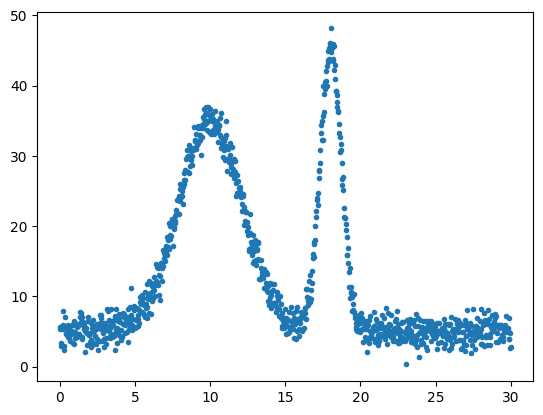

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 模型函数
def my_gauss_func(x, params):
    t1 = params[1] * np.exp(-((x - params[2]) / params[3]) ** 2)
    t2 = params[4] * np.exp(-((x - params[5]) / params[6]) ** 2)
    y = params[0] + t1 + t2
    return y


# 模拟数据
n = 1000
er = 0.03
p = [5, 30, 10, 3, 40, 18, 1]  # 真值参数
x = np.linspace(0, 30, n)
y0 = my_gauss_func(x, p)
ey = np.max(y0) * er * np.random.randn(n)
y = y0 + ey
plt.plot(x, y, ".")

In [2]:


# 定义一个通用的梯度计算方法
def compute_numerical_gradient(params, x, y, my_func, loss_func, epsilon=1e-6):
    """
    params: 当前的参数
    x, y: 数据点
    my_func: 模型函数
    loss_func: 损失函数（带有残差的函数）
    epsilon: 用于数值微分的步长
    """
    num_params = len(params)
    gradients = np.zeros(num_params)
    
    for i in range(num_params):
        params_step_up = params.copy()
        params_step_down = params.copy()
        
        # 计算对每个参数的梯度
        params_step_up[i] += epsilon
        params_step_down[i] -= epsilon
        
        # 计算损失函数在两个点的值
        loss_up = loss_func(params_step_up, x, y, my_func)
        loss_down = loss_func(params_step_down, x, y, my_func)
        
        # 使用中心差分公式计算梯度
        gradients[i] = (loss_up - loss_down) / (2 * epsilon)
    
    return gradients

# 定义损失函数
def loss_function(params, x, y, my_func):
    residuals = y - my_func(x, params)
    loss = np.mean(residuals**2)  # 这里使用MSE作为示例损失函数
    return loss


In [3]:

# Nesterov 动量梯度下降
def nesterov_fit(x, y, initial_params, Likelihood_func, loss_func, learning_rate=0.01, gamma=0.9, max_iters=1000, tol=1e-6):
    params = np.array(initial_params, dtype=float)
    velocity = np.zeros_like(params)
    
    for t in range(max_iters):
        # 预估参数位置
        lookahead_params = params + gamma * velocity
        
        # 计算梯度在预估位置上的值
        grad = compute_numerical_gradient(lookahead_params, x, y, Likelihood_func, loss_func)
        
        # 更新动量和参数
        velocity = gamma * velocity + learning_rate * grad
        params -= velocity
        
        # 计算当前损失
        loss = loss_func(params, x, y, Likelihood_func)
        
        # 打印损失（可选）
        if t % 100 == 0 or t == max_iters - 1:
            print(f"Iteration {t}, Loss: {loss:.6f}")
        
        # 检查收敛条件
        if np.linalg.norm(grad) < tol:
            print(f"Converged after {t} iterations.")
            break
    
    return params

Iteration 0, Loss: 118.293506
Iteration 100, Loss: 6.993947
Iteration 200, Loss: 41.109197
Iteration 300, Loss: 13.523023
Iteration 400, Loss: 28.323281
Iteration 500, Loss: 19.472924
Iteration 600, Loss: 15.612315
Iteration 700, Loss: 24.467460
Iteration 800, Loss: 5.174064
Iteration 900, Loss: 25.777450
Iteration 1000, Loss: 2.653721
Iteration 1100, Loss: 20.078569
Iteration 1200, Loss: 9.588687
Iteration 1300, Loss: 9.136273
Iteration 1400, Loss: 17.458977
Iteration 1500, Loss: 2.180793
Iteration 1600, Loss: 16.606012
Iteration 1700, Loss: 7.213583
Iteration 1800, Loss: 7.191509
Iteration 1900, Loss: 15.165545
Iteration 1999, Loss: 2.994401


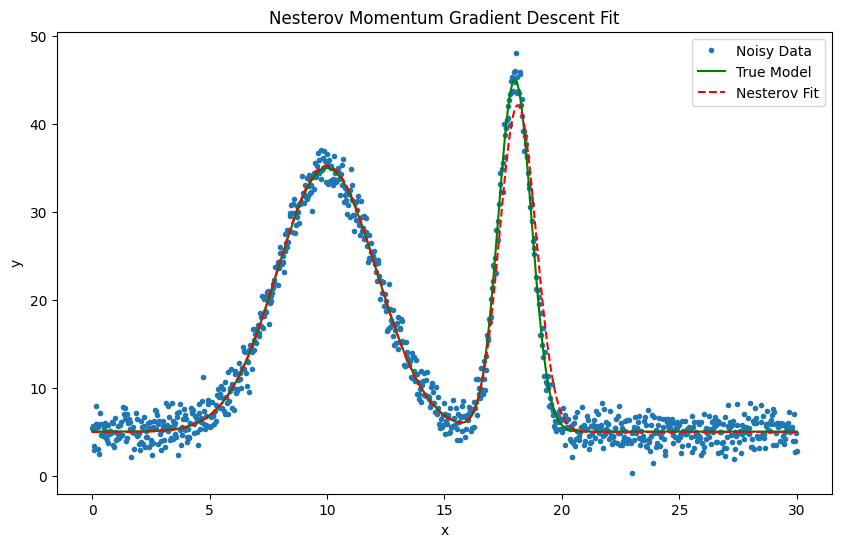

True parameters: [5, 30, 10, 3, 40, 18, 1]
Fitted parameters: [ 4.95660537 30.29695305  9.99404281  2.99253639 37.17769812 18.12464927
  1.09868374]


In [4]:
# 初始猜测
initial_guess = [0, 35, 8, 5, 45, 17, 2]

# 使用 Nesterov 动量梯度下降拟合
fitted_params = nesterov_fit(x, y, initial_guess,my_gauss_func, loss_function, learning_rate=1e-3, max_iters=2000)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x, y, ".", label="Noisy Data")
plt.plot(x, my_gauss_func(x, p), "g-", label="True Model")
plt.plot(x, my_gauss_func(x, fitted_params), "r--", label="Nesterov Fit")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Nesterov Momentum Gradient Descent Fit")
plt.show()

print("True parameters:", p)
print("Fitted parameters:", fitted_params)

## 计算拟合参数方差的方式

1. bootstrap
2. 计算逆hessian矩阵
3. MCMC

**思考**
1. 为什么没有人使用逆hessian矩阵来估计神经网络输出结果的方差呢？

答： 这是由于神经网络通常包含大量的参数（例如，成千上万的权重和偏置）。因此，计算Hessian矩阵（特别是高维问题中的二阶导数矩阵）变得非常复杂和计算密集。Hessian矩阵是一个 n×n 的矩阵，其中 n 是模型的参数数量。对于大型神经网络，计算和存储这个矩阵几乎是不现实的，特别是对于深度网络来说。